## import statements and set up

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## load the data

In [3]:
DATA_PATH = '/Users/yueyangwu/Desktop/CS6140/final_proj/data/wdbc.data'
dataframe = pd.read_csv(DATA_PATH)

# convert diagnosis to code
diagnosis_to_code = {'M' : 1, 'B' : 0}  # {malignant : 1, benign : 0}
dataframe['diagnosis_code'] = [diagnosis_to_code[x] for x in dataframe.diagnosis]

# remove the 'id' and 'diagnosis' columns
dataframe = dataframe.drop(labels=['id', 'diagnosis'], axis=1)
dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [4]:
dataframe['diagnosis_code'].value_counts()

0    357
1    212
Name: diagnosis_code, dtype: int64

## Feature Selection
There are 30 features. Select the top 50% of features

In [5]:
# split data into target and features
y = dataframe['diagnosis_code']
X = dataframe.drop('diagnosis_code', axis=1)

# select the top 50% features
selector = SelectPercentile(mutual_info_classif, percentile=50)
X_reduced = selector.fit_transform(X, y)

# generate the list of featuer that were kept
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst']

## Remove unselected features

In [6]:
# selected_columns.append('diagnosis_code')
X = X[selected_columns]
X

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


## Split training data(80%) and test data(20%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 15), (114, 15))

## Fit the Logistic Regression Model

In [8]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Test on the test dataset and calculating the accuracy of the Logistic Regression Model

In [9]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


## Fit the Random Tree Model

In [11]:
# define the model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

## Test on the test dataset and calculating the accuracy of the Random Tree Model

In [ ]:
y_pred_rt = 

# !!!***Below are some testing code, delete them before submitting the work***!!!

# See how each feature influences the results
take a look at the mean values of each feature for the malignant and benign diagnosis

In [220]:
dataframe.groupby('diagnosis_code').mean().iloc[:, 0:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis_code,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


In [124]:
dataframe.groupby('diagnosis_code').mean().iloc[:, 10:20]

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se
diagnosis_code,,,,,,,,,,
0,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636
1,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062


In [125]:
dataframe.groupby('diagnosis_code').mean().iloc[:, 20:30]

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis_code,,,,,,,,,,
0,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# Observation:
- For malignant result, the value of radius, texture, perimeter, area, compactness, concavity, and concave points are higher than the benign ones.
- Smoothness, symmetry, and fractal dimension has little influences on the results. \

In [182]:
# remove low-influencial features from dataframe
dataframe = dataframe.drop(labels=['smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean', 'symmetry_se', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst'], axis=1)
dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,texture_se,perimeter_se,...,concavity_se,concave_points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst,diagnosis_code
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,0.9053,8.589,...,0.05373,0.01587,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654,1
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,0.7339,3.398,...,0.01860,0.01340,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860,1
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,0.7869,4.585,...,0.03832,0.02058,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430,1
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,1.1560,3.445,...,0.05661,0.01867,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575,1
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,0.7813,5.438,...,0.05688,0.01885,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,1.2560,7.673,...,0.05198,0.02454,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216,1
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,2.4630,5.203,...,0.03950,0.01678,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628,1
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,1.0750,3.425,...,0.04730,0.01557,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418,1
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,1.5950,5.772,...,0.07117,0.01664,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650,1


# See how each feature is correlated with others
plot the first 30 values of radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean

<AxesSubplot:>

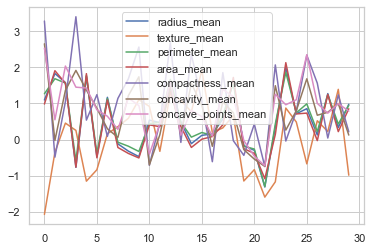

In [135]:
# normalize the data with mean normalization
def mean_norm(df):
    return df.apply(lambda x : (x - x.mean()) / x.std(), axis=0)
df_mean_norm = mean_norm(dataframe)
df_mean_norm.iloc[:30, :7].plot.line()